# Module 15 – SVM Practice Notebook

This practice notebook is focused only on **Support Vector Machine (SVM)** for classification.

You will work with:
- A synthetic **circles** dataset for non linear decision boundaries
- A real world **wine classification** dataset (from `sklearn.datasets.load_wine`)

Complete the `TODO` parts yourself to practice implementing SVM from scratch.

## 1. Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

np.random.seed(42)
plt.rcParams['figure.figsize'] = (6, 4)


## 2. SVM on Circles Dataset with Different Kernels

In this section you will:
- Generate a **non linearly separable** dataset using `make_circles`
- Train SVM with different kernels: `linear`, `poly`, and `rbf`
- Compare how the decision boundary changes


In [2]:
# 2.1 Generate circles dataset
# TODO: use make_circles to generate a dataset with 500 samples
# Hint: use noise around 0.2 and factor around 0.5

X_circ, y_circ = make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=42)
X_circ.shape

(500, 2)

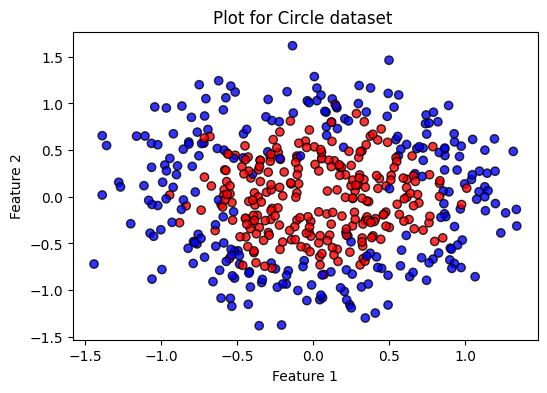

In [3]:
# 2.2 Visualise the raw circles dataset
# TODO: create a scatter plot of the circles dataset
# Hint: use plt.scatter with c=y_circ and cmap='bwr'
plt.scatter(X_circ[:, 0], X_circ[:,1], c=y_circ, cmap='bwr', edgecolors='k', alpha=0.8)
plt.title("Plot for Circle dataset ")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
# 2.3 Train test split and scaling
# TODO: split the data into train and test sets
# Then scale the features using StandardScaler

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_circ, y_circ, test_size=0.2, stratify= y_circ)
scaler_circ = StandardScaler()
Xc_train_scaled = scaler_circ.fit_transform(Xc_train)
Xc_test_scaled = scaler_circ.transform(Xc_test)


In [5]:
# Helper function to plot decision boundary for 2D data
def plot_decision_boundary(model, X, y, title='Decision boundary'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.25, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', alpha=0.8)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


Linear kernel accuracy: 0.54


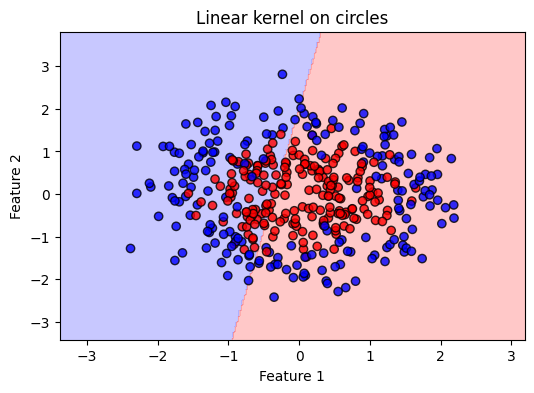

In [6]:
# 2.4 Train linear, polynomial, and RBF SVM on circles data
# TODO: create three SVC models with kernels 'linear', 'poly', and 'rbf'
# Train each on Xc_train_scaled and yc_train
# Then evaluate accuracy on Xc_test_scaled and yc_test
# Finally, call plot_decision_boundary for each model on the TRAIN set

# Example structure (fill in):
svc_lin = SVC(kernel='linear', C=1.0, random_state=42)
svc_lin.fit(Xc_train_scaled, yc_train)
y_pred_lin = svc_lin.predict(Xc_test_scaled)
print('Linear kernel accuracy:', accuracy_score(yc_test, y_pred_lin))
plot_decision_boundary(svc_lin, Xc_train_scaled, yc_train, 'Linear kernel on circles')

# Repeat similarly for polynomial and RBF kernels.


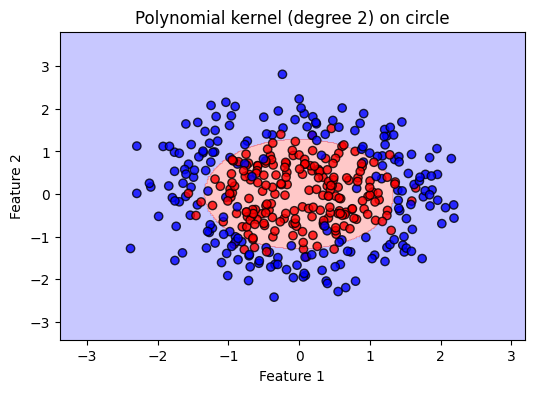

Accuracy (polynomial kernel on circle): 0.85


In [24]:
# Polynomial kernel on circle
svc_poly_circ = SVC(kernel='poly', degree=2, C=1.0, gamma='scale', random_state=42)
svc_poly_circ.fit(Xc_train_scaled, yc_train)
plot_decision_boundary(svc_poly_circ, Xc_train_scaled, yc_train,
                       title='Polynomial kernel (degree 2) on circle')
print('Accuracy (polynomial kernel on circle):', accuracy_score(yc_test,
      svc_poly_circ.predict(Xc_test_scaled)))

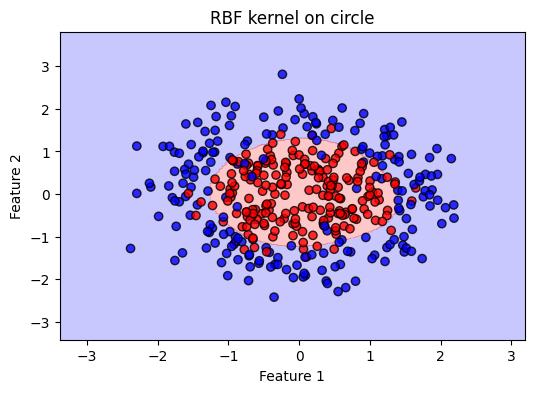

Accuracy (RBF kernel on circle): 0.85


In [28]:
# RBF kernel on circle
svc_rbf_circ = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_rbf_circ.fit(Xc_train_scaled, yc_train)
plot_decision_boundary(svc_rbf_circ, Xc_train_scaled, yc_train,
                       title='RBF kernel on circle')
print('Accuracy (RBF kernel on circle):', accuracy_score(yc_test,
      svc_rbf_circ.predict(Xc_test_scaled)))

### Reflection
- কোন kernel circles ডেটাতে সবচেয়ে ভালো কাজ করল?
- linear kernel কেন এই ডেটাতে struggle করে?
- polynomial আর RBF kernel এর boundary shape কেমন পরিবর্তন হয়, বোঝার চেষ্টা করুন।

## 3. SVM on Real Data: Wine Classification

এখানে আমরা `sklearn.datasets.load_wine` ব্যবহার করব।
- এটি একটি **multi class classification** সমস্যা।
- প্রতিটি sample একটি wine, আর target হলো wine এর class (৩ ধরনের)।

উদ্দেশ্য:
- ডেটা explore করা
- SVM train করা
- Accuracy এবং classification report দেখা


In [29]:
# 3.1 Load the wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

print('Shape of X:', X_wine.shape)
print('Classes:', np.unique(y_wine))
print('Feature names:', wine.feature_names)

Shape of X: (178, 13)
Classes: [0 1 2]
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [31]:
# 3.2 Train test split and scaling
# TODO: split X_wine, y_wine into train and test sets

# Then apply StandardScaler on the features

Xw_train, Xw_test, yw_train, yw_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42, stratify=y_wine)
scaler_wine = StandardScaler()
Xw_train_scaled = scaler_wine.fit_transform(Xw_train)
Xw_test_scaled = scaler_wine.transform(Xw_test)


In [32]:
# 3.3 Train an SVM classifier with RBF kernel
# TODO: create an SVC with kernel='rbf', C=1.0, gamma='scale'
# Train it on the scaled training data
# Then predict on the test set and compute accuracy

svc_wine = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_wine.fit(Xw_train_scaled, yw_train)
yw_pred = svc_wine.predict(Xw_test_scaled)
acc_wine = accuracy_score(yw_test, yw_pred)
print(f'Test accuracy (wine, RBF SVM): {acc_wine:.3f}')


Test accuracy (wine, RBF SVM): 0.972


In [35]:
# 3.4 Classification report and confusion matrix
# TODO: print classification_report and confusion_matrix for the wine dataset

print(classification_report(yw_test, yw_pred))
print(confusion_matrix(yw_test, yw_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]


## 4. Mini Hyperparameter Experiment (Wine Data)

এখন wine ডেটার জন্য ছোট একটা grid search টাইপ experiment করবেন।
- কয়েকটা C এর ভ্যালু
- কয়েকটা gamma এর ভ্যালু
- সব combination এর জন্য accuracy বের করুন।


In [37]:
# 4.1 Manual loop over C and gamma
# TODO: create small lists for C_values and gamma_values

# For each pair (C, gamma), train an RBF SVM on the wine data
# Store the test accuracy in a list of dictionaries
# Finally, convert it to a DataFrame and sort by accuracy

C_values = [0.1, 1, 10, 50]
gamma_values = [0.01, 0.1, 'scale', 10]
results = []
for C in C_values:
   for gamma in gamma_values:
      model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
      model.fit(Xw_train_scaled, yw_train)
      y_pred = model.predict(Xw_test_scaled)
      acc = accuracy_score(yw_test, y_pred)
      results.append({'C': C, 'gamma': gamma, 'accuracy': acc})

df_results = pd.DataFrame(results)
df_results.sort_values('accuracy', ascending=False)


,C,gamma,accuracy
4,1.0,0.01,1.000000
2,0.1,scale,0.972222
5,1.0,0.1,0.972222
6,1.0,scale,0.972222
12,50.0,0.01,0.972222
13,50.0,0.1,0.972222
9,10.0,0.1,0.972222
1,0.1,0.1,0.944444
14,50.0,scale,0.944444
10,10.0,scale,0.944444


### Reflection
- কোন C এবং gamma combination সবচেয়ে ভালো কাজ করল?
- খুব বেশি বড় C বা খুব বেশি বড় gamma দিলে কি overfitting মনে হচ্ছে?
- wine ডেটা কি linear SVM এর জন্য যথেষ্ট সহজ, নাকি RBF noticeably ভালো কাজ করছে?
